In [14]:
from sklearn import datasets
import numpy as np
import scipy.stats as ss 
import random 
import matplotlib.pyplot as plt

In [15]:
def distance(p1, p2): 
    return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [16]:
def majority_vote(votes): 
    vote_counts = {} 
    for vote in votes: 
        if vote in vote_counts: 
           vote_counts[vote]+= 1
        else: 
            vote_counts[vote]= 1
    winners = [] 
    max_count = max(vote_counts.values()) 
    for vote, count in vote_counts.items(): 
        if count == max_count: 
            winners.append(vote) 
    return random.choice(winners)

In [17]:
def find_nearest_neighbours(p, points, k = 5):   
    distances = np.zeros(points.shape[0]) 
    for i in range(len(distances)): 
        distances[i]= distance(p, points[i]) 
    ind = np.argsort(distances)      
    return ind[:k] 

In [18]:
def knn_predict(p, points, outcomes, k = 5): 
    ind = find_nearest_neighbours(p, points, k) 
    return majority_vote(outcomes[ind]) 

In [19]:
def make_prediction_grid(predictors, outcomes, limits, h, k): 
    (x_min, x_max, y_min, y_max) = limits 
    xs = np.arange(x_min, x_max, h) 
    ys = np.arange(y_min, y_max, h) 
    xx, yy = np.meshgrid(xs, ys) 
  
    prediction_grid = np.zeros(xx.shape, dtype = int) 
    for i, x in enumerate(xs): 
        for j, y in enumerate(ys): 
            p = np.array([x, y]) 
            prediction_grid[j, i] = knn_predict(p, predictors, outcomes, k) 
    return (xx, yy, prediction_grid) 

In [20]:
def plot_prediction_grid (xx, yy, prediction_grid, filename): 
    from matplotlib.colors import ListedColormap 
    background_colormap = ListedColormap (["hotpink", "lightskyblue", "yellowgreen"]) 
    observation_colormap = ListedColormap (["red", "blue", "green"]) 
    plt.figure(figsize =(10, 10)) 
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5) 
    plt.scatter(predictors[:, 0], predictors [:, 1], c = outcomes, cmap = observation_colormap, s = 50) 
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2') 
    plt.xticks(()); plt.yticks(()) 
    plt.xlim (np.min(xx), np.max(xx)) 
    plt.ylim (np.min(yy), np.max(yy)) 
    plt.savefig(filename) 

In [21]:
iris = datasets.load_iris() 
predictors = iris.data[:, 0:2] 
outcomes = iris.target

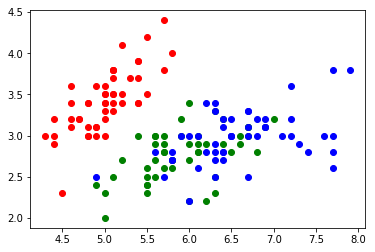

In [22]:
plt.plot(predictors[outcomes == 0][:, 0], predictors[outcomes == 0][:, 1], "ro") 
plt.plot(predictors[outcomes == 1][:, 0], predictors[outcomes == 1][:, 1], "go") 
plt.plot(predictors[outcomes == 2][:, 0], predictors[outcomes == 2][:, 1], "bo")

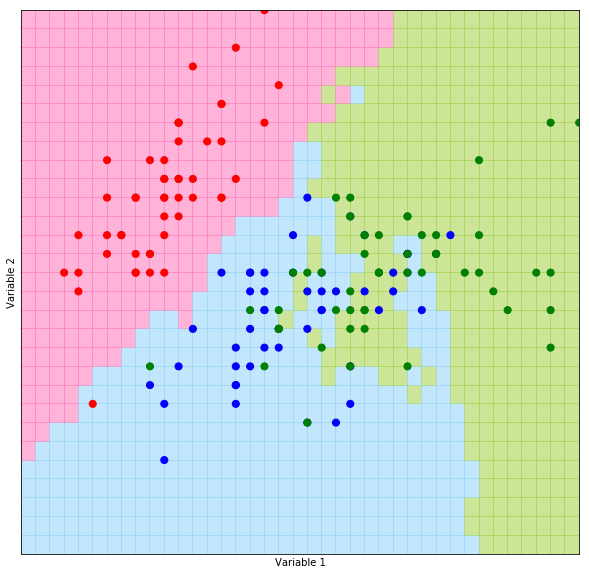

In [23]:
k = 5; filename ="iris_grid.pdf"; limits =(4, 8, 1.5, 4.5); h = 0.1
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k) 
plot_prediction_grid(xx, yy, prediction_grid, filename) 
plt.show()

In [24]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors]) 

In [36]:
y = iris.target
from sklearn.metrics import classification_report

In [37]:
classification_report(y,my_predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        50\n           1       0.79      0.74      0.76        50\n           2       0.76      0.82      0.79        50\n\n   micro avg       0.85      0.85      0.85       150\n   macro avg       0.85      0.85      0.85       150\nweighted avg       0.85      0.85      0.85       150\n'

In [34]:
print(100 * np.mean(sk_predictions == outcomes))

83.33333333333334


In [45]:
right_ones = []
wrong_ones = []
for i in range(len(my_predictions)):
    if my_predictions[i] == y[i]:
        right_ones.append(i)
    else:
        wrong_ones.append(i)
        
print("Values at these indices are correct predictions: ",right_ones)
print()
print("Values at these indices are wrong predictions: ",wrong_ones)


Values at these indices are correct predictions:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 69, 70, 71, 73, 76, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 120, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149]

Values at these indices are wrong predictions:  [41, 50, 51, 52, 54, 56, 61, 67, 72, 74, 75, 77, 82, 97, 106, 113, 114, 119, 121, 126, 127, 134, 140]
